# 1. Install, Imports, Settings

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams["figure.figsize"] = [10, 6]
%config InlineBackend.figure_format = 'retina'

# 2. Load data

In [4]:
df = pd.read_csv("data/alertas.csv", sep="|")

print("Total Number of documents:", len(df))
print("Number of documents with no accesible text (password protected):", len(df[df['Text'].isnull()]))
print("Number of documents with accesible text:",  len(df[df['Text'].notnull()]))

Total Number of documents: 1753
Number of documents with no accesible text (password protected): 5
Number of documents with accesible text: 1748


In [5]:
df.head()

,Filename,Text,Subtype,Type,Year,Path,Departamento
0,"AT N° 003-18 NAR-Cumbitara, Maguí Payán, Polic...",Defensoria \ndel Pueblo \nCOLOMB IA \n \nBog...,Alerta Temprana,Advertencia,2018,data\Advertencia_PDF\AT 2018\AT N° 003-18 NAR-...,Nariño
1,AT N° 004-18 NAR-Tumaco.pdf,Defensoría \ndel Pueblo \nCO LO Mllt \nCarre...,Alerta Temprana,Advertencia,2018,data\Advertencia_PDF\AT 2018\AT N° 004-18 NAR-...,Nariño
2,AT N° 005-18 COR-Tierralta.pdf,Carrera 9 16 21 Bogotá DC \nPBX 57 1 3147300...,Alerta Temprana,Advertencia,2018,data\Advertencia_PDF\AT 2018\AT N° 005-18 COR-...,Córdoba
3,AT N° 006-18 ARA-Saravena.pdf,Defensoría \ndel Pueblo \nCarrera 9 1621 Bo...,Alerta Temprana,Advertencia,2018,data\Advertencia_PDF\AT 2018\AT N° 006-18 ARA-...,Arauca
4,"AT N° 007-18 MET-Puerto Lleras, Puerto Rico y ...",San Vicente Bajo \nl \nMargen \nIzquierda ...,Alerta Temprana,Advertencia,2018,data\Advertencia_PDF\AT 2018\AT N° 007-18 MET-...,Meta


# 3. Number of Documents by Departamento

In [6]:
dft = df.groupby(["Departamento", "Type", "Subtype"]).agg({"Filename":"count"})
dft = dft.reset_index()
dft = pd.pivot_table(dft, values='Filename', index=['Departamento'],
                    columns=['Subtype'], aggfunc=np.sum)
dft = dft.fillna(0)
dft["Total"] = dft.sum(axis=1)
dft

Subtype,Alerta Temprana,Informe de Riesgo,Informe de Seguimiento,Notas,Total
Departamento,,,,,
Amazonas,1.0,2.0,0.0,0.0,3.0
Antioquia,37.0,37.0,5.0,26.0,105.0
Arauca,15.0,25.0,3.0,38.0,81.0
Atlántico,2.0,12.0,1.0,8.0,23.0
Bogotá,7.0,9.0,2.0,11.0,29.0
Bolívar,15.0,34.0,11.0,21.0,81.0
Boyacá,5.0,6.0,1.0,1.0,13.0
Caldas,6.0,10.0,4.0,11.0,31.0
Caquetá,4.0,20.0,1.0,13.0,38.0


Text(0, 0.5, '')

<Figure size 720x432 with 0 Axes>

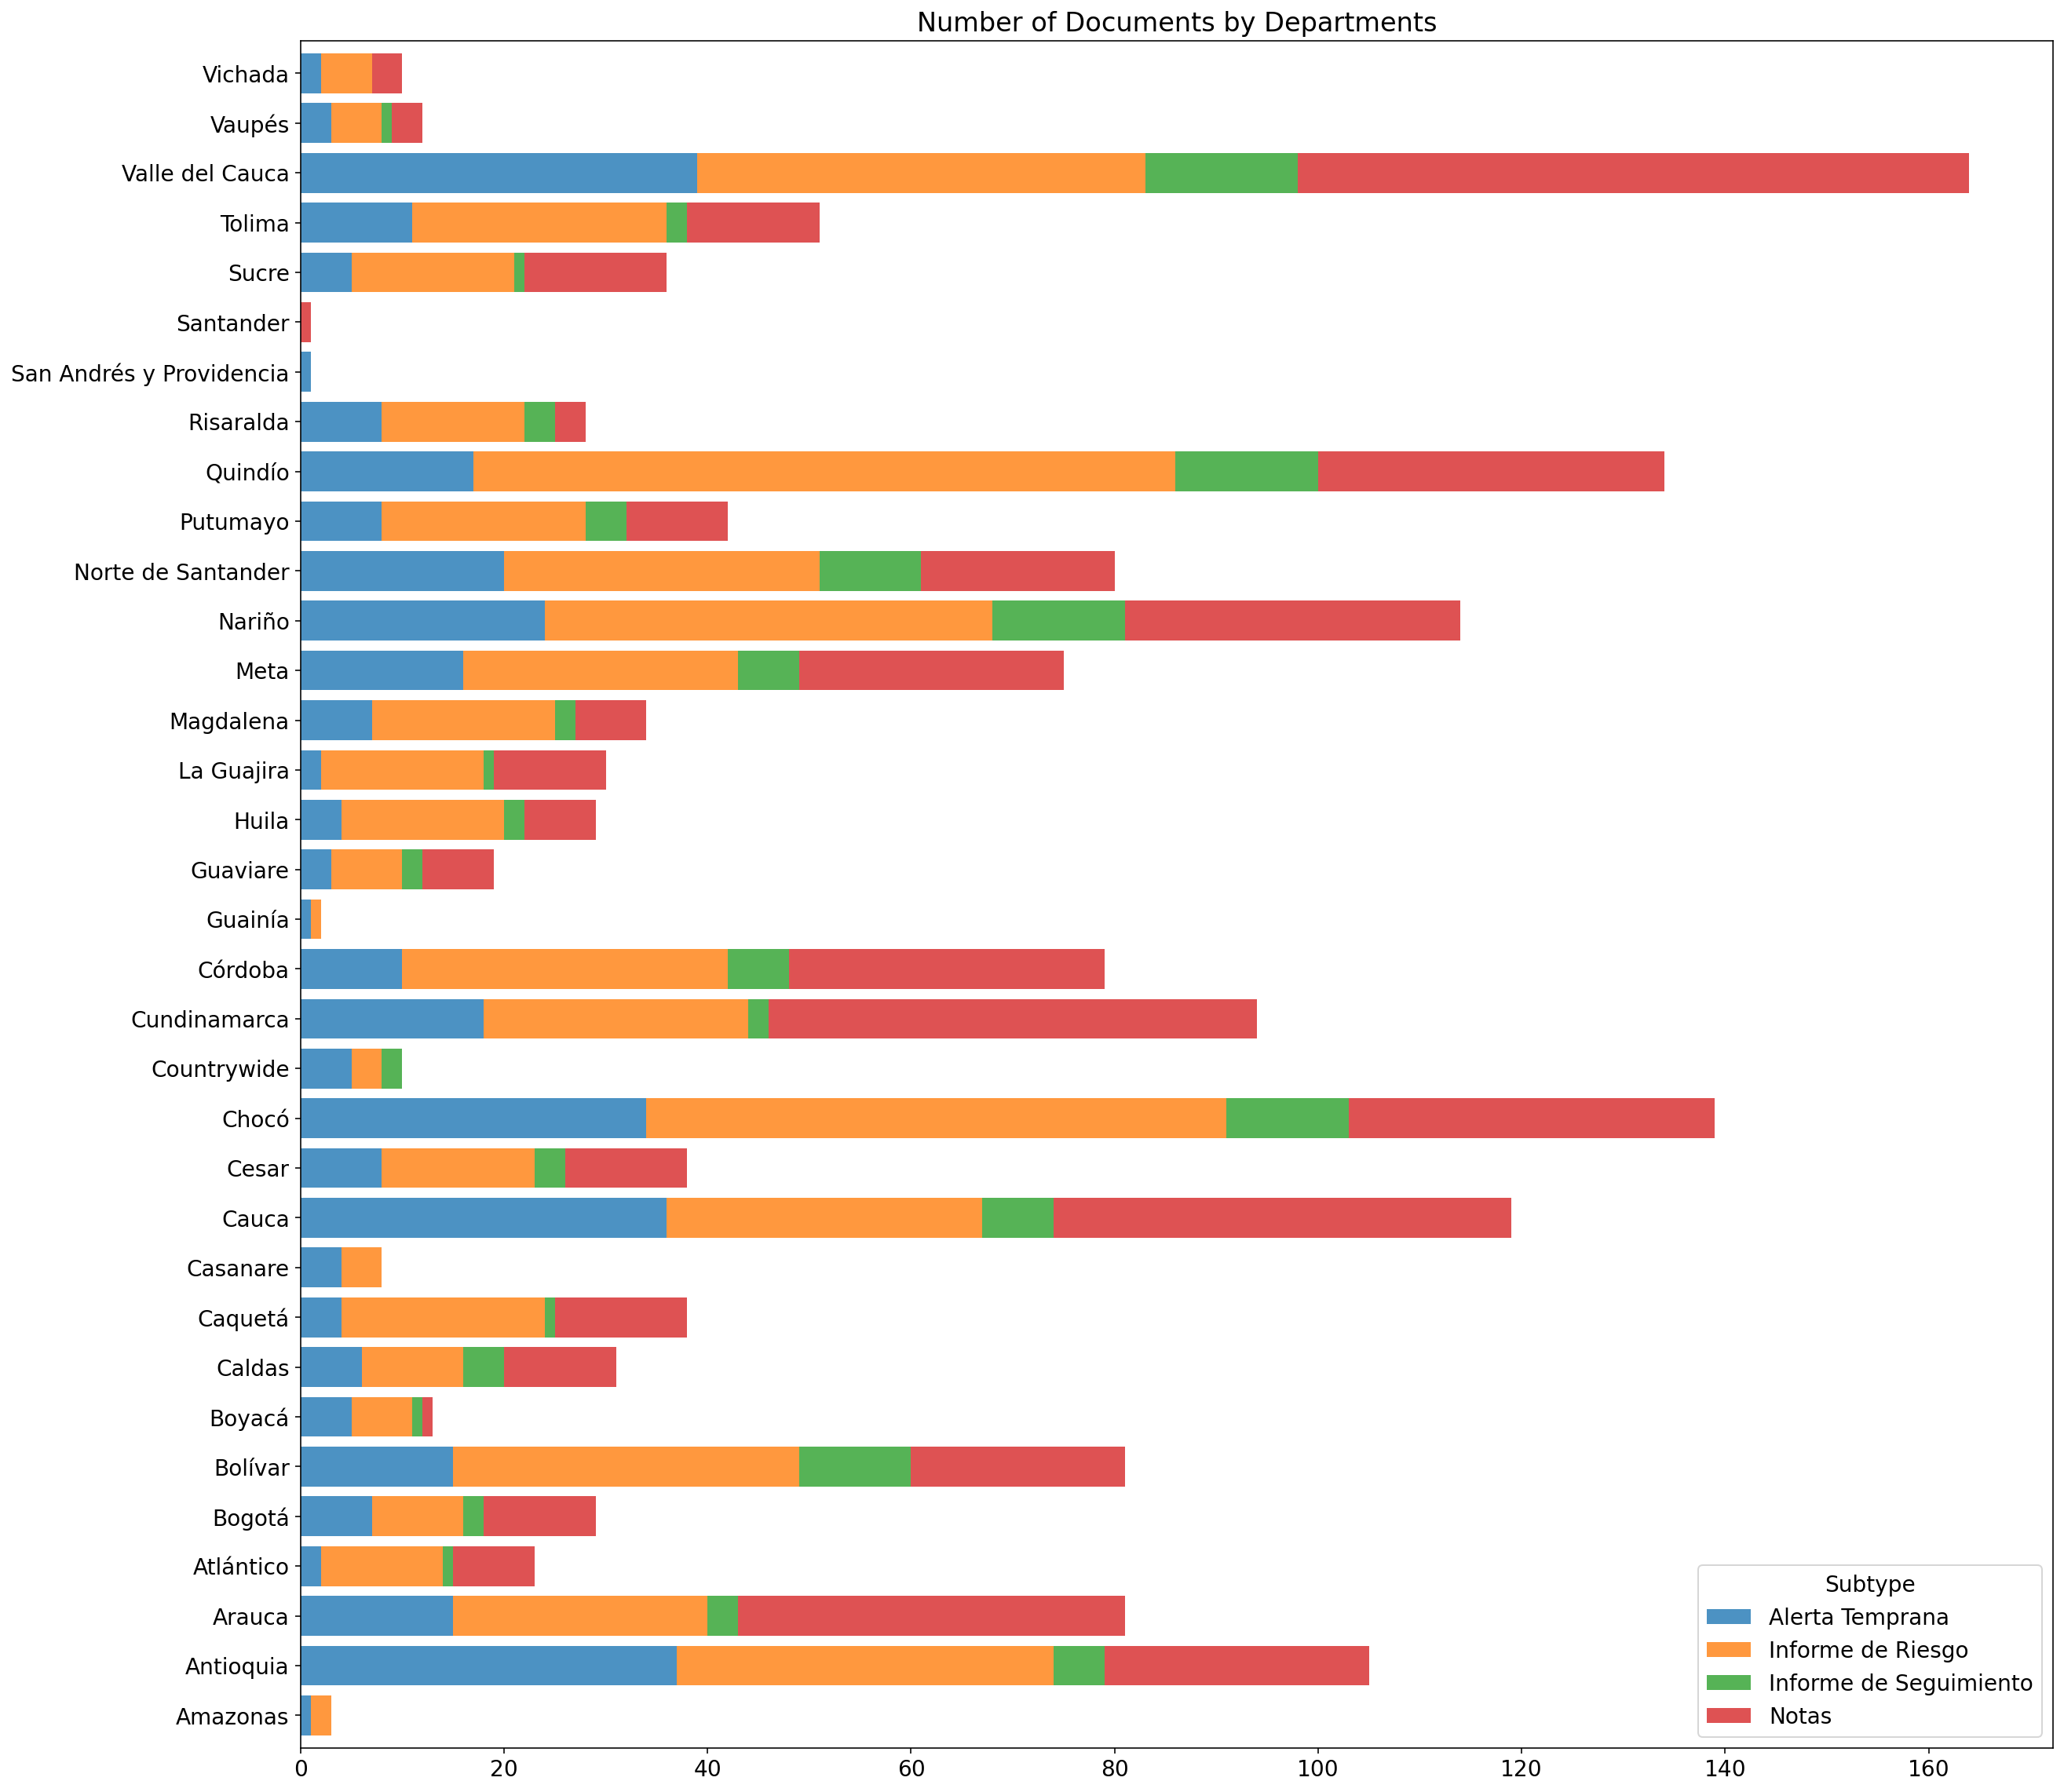

In [7]:
plt.figure()
plt.rcParams.update({'font.size': 14})

dft.drop("Total", axis=1).plot(kind="barh", figsize=(20, 20), stacked=True, width=0.8, alpha=0.8, rot=0)
plt.title("Number of Documents by Departments")
plt.xlabel("")
plt.ylabel("")

# 4 Total of documents by Department - Descending Order

In [8]:
dft['Total'].sort_values(ascending = False).to_frame()

,Total
Departamento,
Valle del Cauca,164.0
Chocó,139.0
Quindío,134.0
Cauca,119.0
Nariño,114.0
Antioquia,105.0
Cundinamarca,94.0
Arauca,81.0
Bolívar,81.0


# 6. Statistical Distribution - Departments

In [9]:
dft['Total'].describe().to_frame()

,Total
count,34.000000
mean,51.558824
std,45.297128
min,1.000000
25%,14.500000
50%,35.000000
75%,80.750000
max,164.000000


# 7. Documents distributed by Department - Timeline

### Las lineas verticales dividen los periodos de estudio que establecimos en la metodologia del paper. 

In [10]:
dftd = df.groupby(["Departamento", "Year"]).agg({"Filename":"count"})
dftd = dftd.reset_index()
dftd = pd.pivot_table(dftd, values='Filename', index=['Departamento'],
                    columns=['Year'], aggfunc=np.sum)
dftd = dftd.fillna(0)
dftd["Total"] = dftd.sum(axis=1)

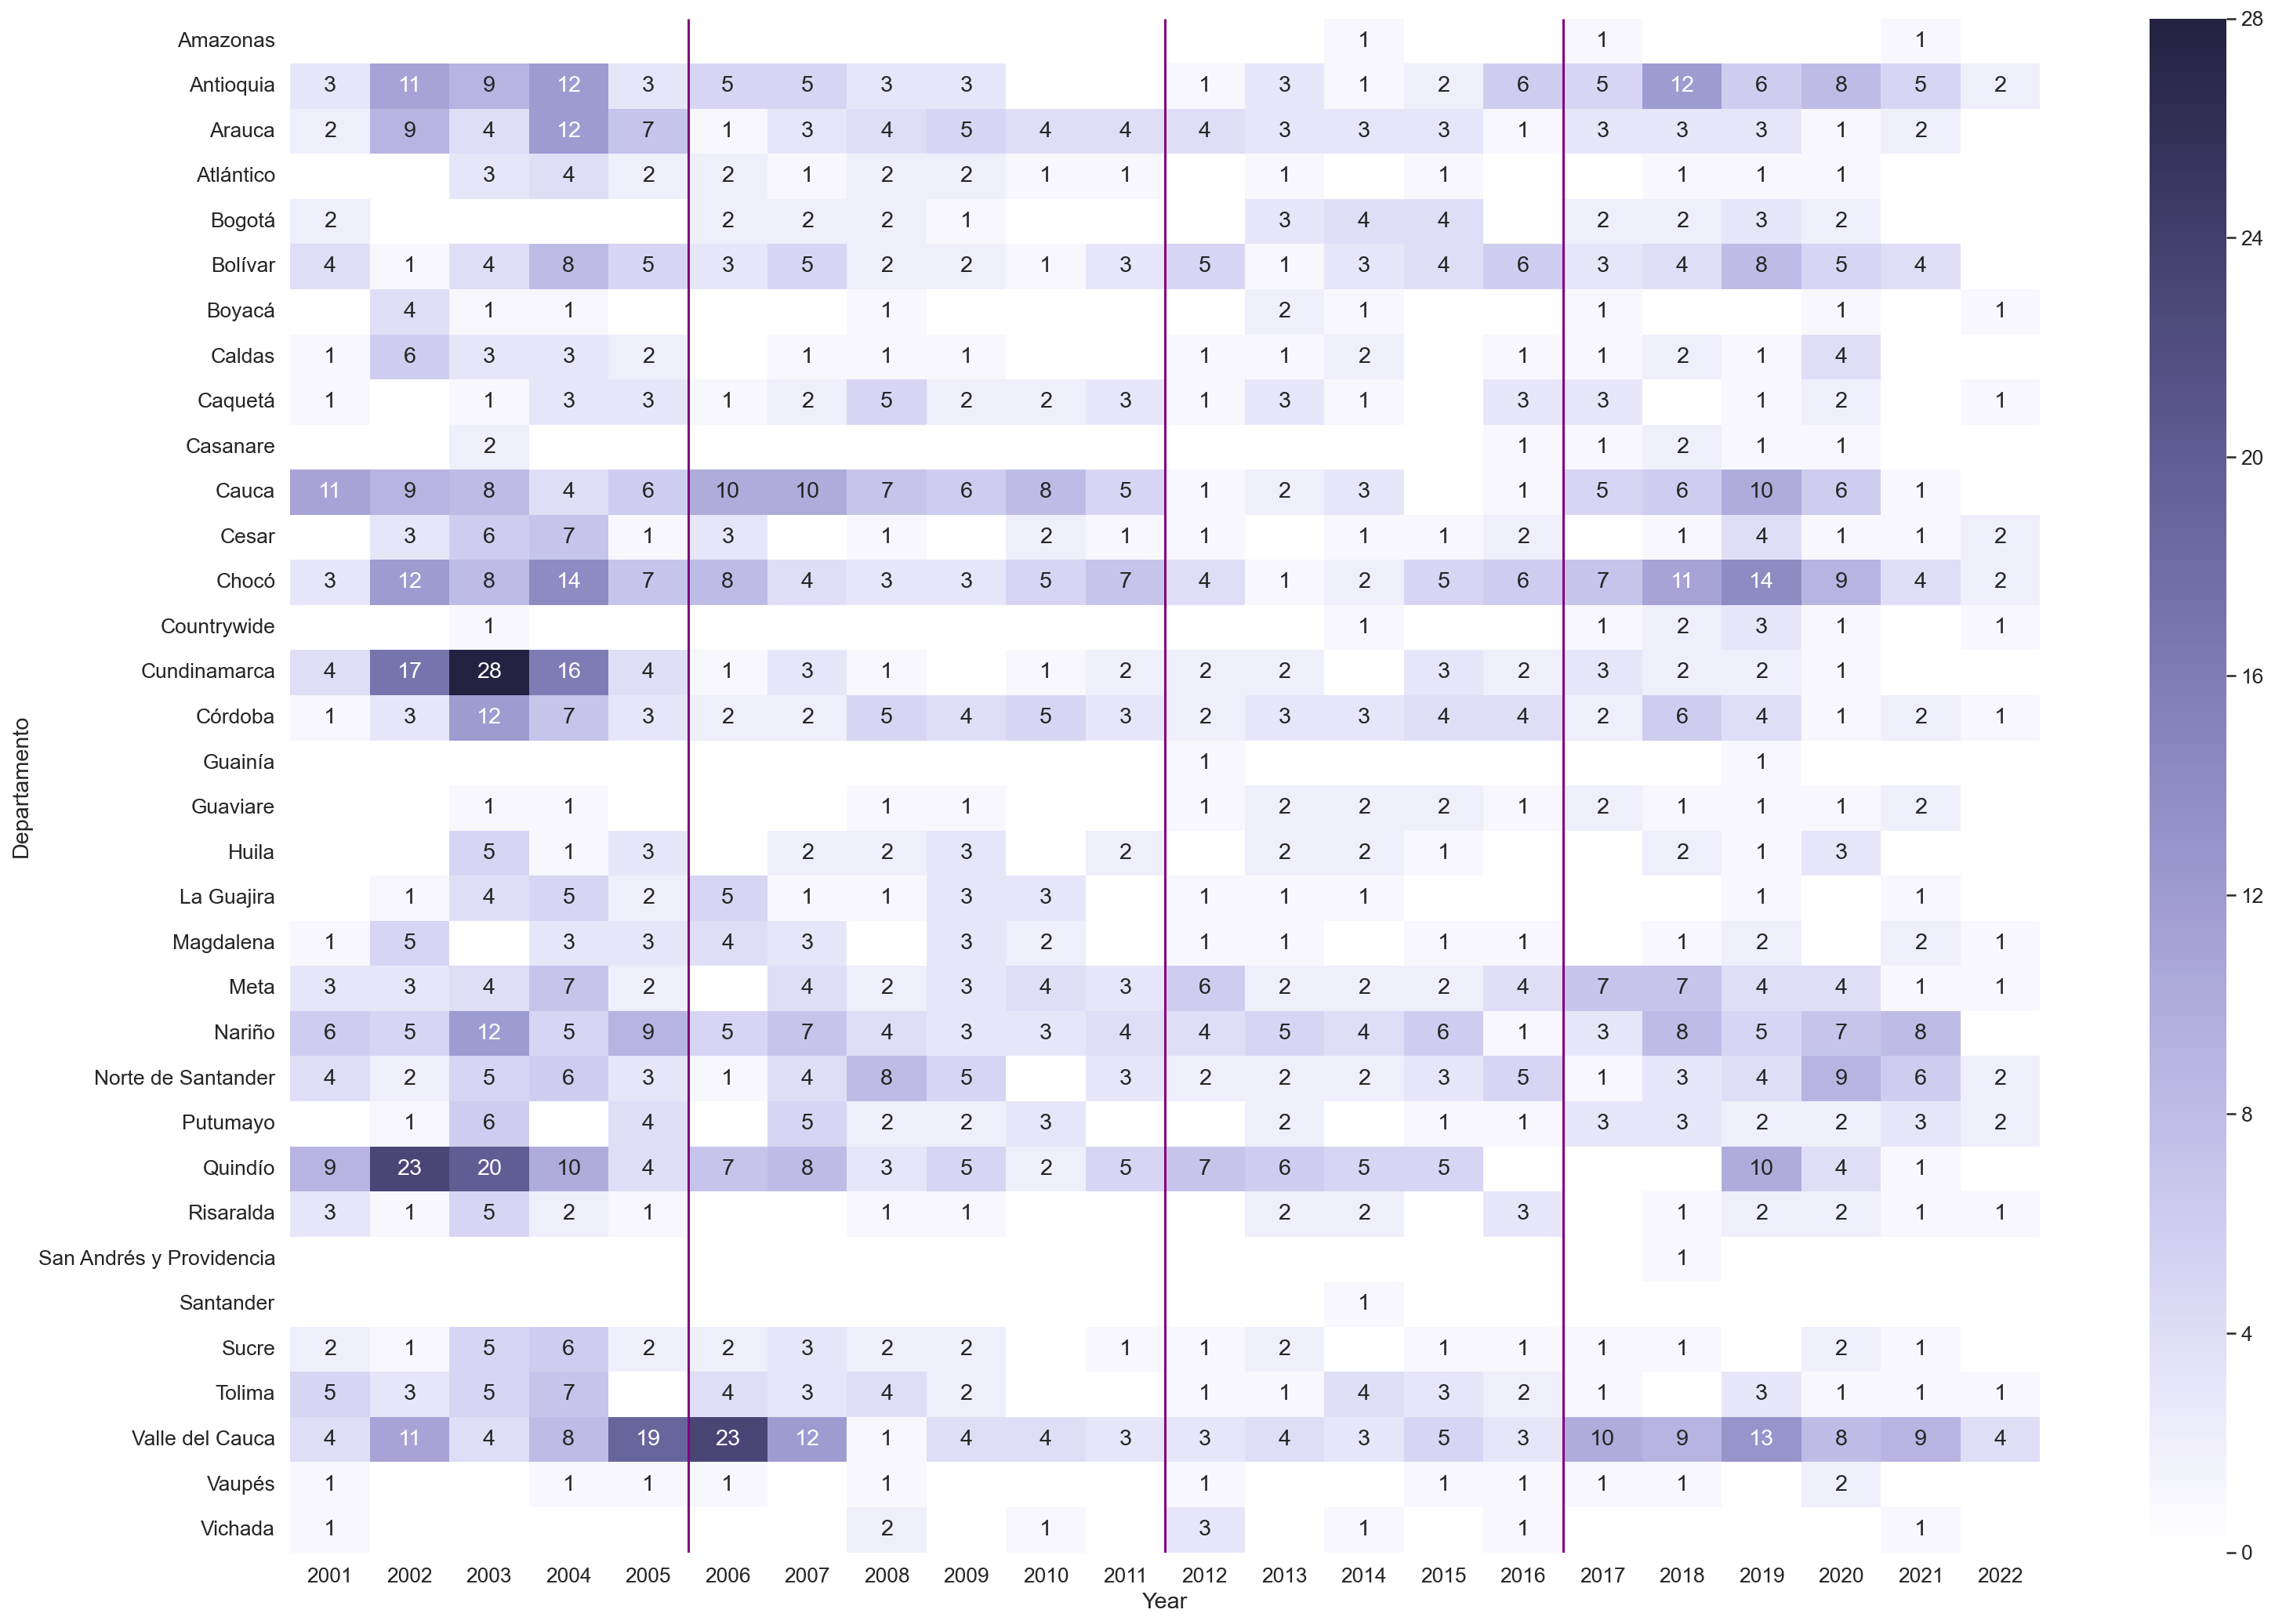

In [11]:
import matplotlib.pyplot as plt

sns.set(font_scale=1.2)
palette = sns.cubehelix_palette(n_colors= 7, rot=0, dark=0.15, light=1, as_cmap=True)

plt.figure(figsize=(25, 18))
ax = sns.heatmap(dftd.drop("Total", axis=1), annot=True, linewidth=0, cmap=palette)

for text in ax.texts:
    if text.get_text() == '0':
        text.set_text('')
        
ax.vlines([5, 11, 16],  ymin = 0, ymax = 45,
           colors = 'purple',
          linestyle='solid'
           )
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 4, 8,12,16,20,24,28])

plt.show()

# 7. Export HTML

In [13]:
!jupyter nbconvert --to html 4_Distribution_of_documents_Departamentos.ipynb

[NbConvertApp] Converting notebook 4_Distribution_of_documents_Departamentos.ipynb to html
[NbConvertApp] Writing 1180549 bytes to 4_Distribution_of_documents_Departamentos.html
